##  Commercially Available Compounds with Specific Function Group 

In [1]:
from rdkit import Chem
import pandas as pd
from util import *

data from https://reaxys.emolecules.com/index.php substructure search via Benzaldehyde

In [2]:
df=pd.read_csv('./cho_full.csv')

In [3]:
#df['mol']=apply_parallel(df['SMILES'],smile_to_mol_df)
#df.to_pickle('temp_db.pkl')

In [4]:
df=pd.read_pickle('temp_db.pkl')

In [5]:
df

,MWT,MF,PARENT_MWT,SMILES,SUPPLIER_NAME,CATALOG_NUMBER,CAS,CHEMICAL_NAME,MFCD,EMOLECULES_ID,mol
0,106.12,C7H6O,106.12,O=Cc1ccccc1,Alfa Aesar (US),0,NaN,"Benzaldehyde, 99+%",MFCD00003299,477086,<rdkit.Chem.rdchem.Mol object at 0x0000020EE06...
1,106.12,C7H6O,106.12,O=Cc1ccccc1,Target Molecule,0,NaN,Benzaldehyde,MFCD00003299,477086,<rdkit.Chem.rdchem.Mol object at 0x0000020EE06...
2,106.12,C7H6O,106.12,O=Cc1ccccc1,Acros Organics,37836,NaN,"Benzaldehyde, 99.5+%, pure, redistilled, AcroS...",MFCD00003299,477086,<rdkit.Chem.rdchem.Mol object at 0x0000020EE06...
3,106.12,C7H6O,106.12,O=Cc1ccccc1,Key Organics/BIONET,0,NaN,Benzaldehyde,MFCD00003299,477086,<rdkit.Chem.rdchem.Mol object at 0x0000020EE06...
4,106.12,C7H6O,106.12,O=Cc1ccccc1,TCI America,0,NaN,Benzaldehyde,MFCD00003299,477086,<rdkit.Chem.rdchem.Mol object at 0x0000020EE06...
...,...,...,...,...,...,...,...,...,...,...,...
146043,1402.71,C64H111N3O26S2,1402.71,O=Cc1ccc(cc1)C(=O)NCCOCCOCCOCCOCCOCCOCCOCCOCCO...,Target Molecule,0,NaN,Ald-Ph-amido-PEG23-OPSS,NaN,324162656,None
146044,1426.54,C65H107F4NO28,1426.54,Fc1cc(F)c(F)c(OC(=O)CCOCCOCCOCCOCCOCCOCCOCCOCC...,Broadpharm,0,NaN,Ald-Ph-PEG24-TFP ester,MFCD21363344,50524418,None
146045,1426.54,C65H107F4NO28,1426.54,Fc1cc(F)c(F)c(OC(=O)CCOCCOCCOCCOCCOCCOCCOCCOCC...,"Combi-Blocks, Inc.",0,NaN,4-Fb-peg(24)-tfp,MFCD21363344,50524418,None
146046,1426.54,C65H107F4NO28,1426.54,Fc1cc(F)c(F)c(OC(=O)CCOCCOCCOCCOCCOCCOCCOCCOCC...,Apollo Scientific US,0,NaN,Ald-Ph-PEG24-TFP ester,MFCD21363344,50524418,None


MFC Filter   # get the mol with more than 20 suppliers and  MW<200

In [6]:
df['MFC#']=df.groupby(['SMILES'])['SMILES'].transform('size')
df=df[df['MFC#']>=10].drop_duplicates(subset='SMILES')
df=df[df['MWT']<200]
df.dropna(subset=['mol'],inplace=True)

C:\Users\t1334\anaconda3\envs\rdkit\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:190: UserWarning: Truncating the list of molecules to be displayed to 18. Change the maxMols value to display more.
  warnings.warn(


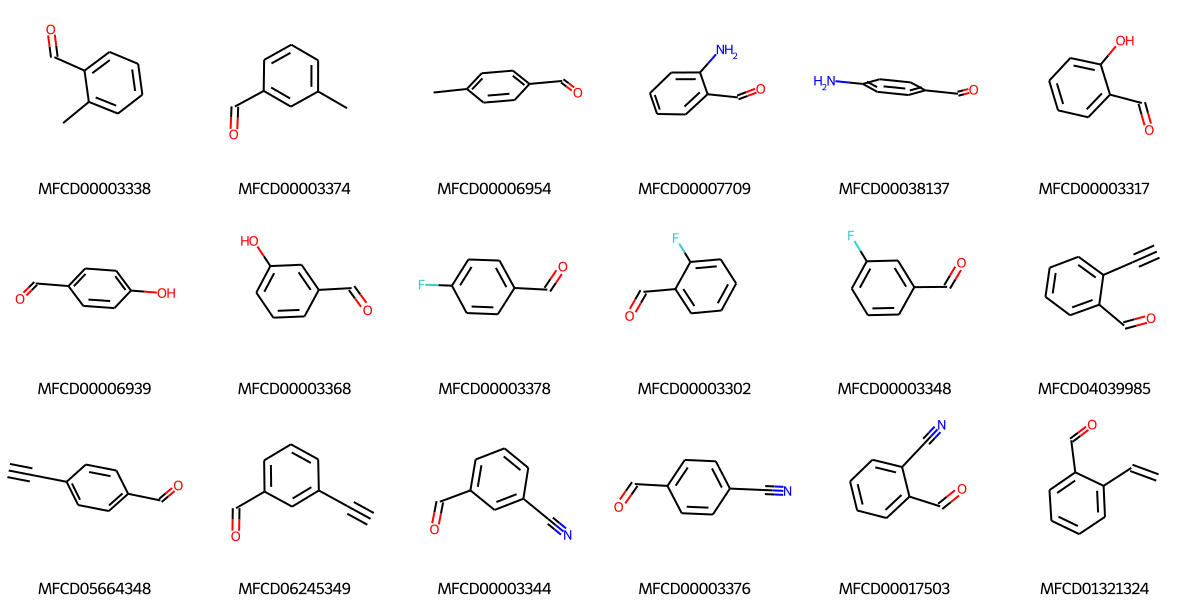

In [7]:
Chem.Draw.MolsToGridImage(df['mol'].apply(Chem.RemoveHs),legends=list(df['MFCD']),molsPerRow=6,maxMols=18)

Filter atomic number >18 (> 3rd row)  and remove Boron

In [8]:
df=df[df['mol'].apply(atom_filter,atomic_range=(1,18),ban_list=['B'])]

Filter mol with more than one CHO group and amine

In [9]:
df=df[df['mol'].apply(filter_r,patt= {'N[H]':0 , '[H]C=O':1})]

In [10]:
df.to_csv('match_CHO.csv')

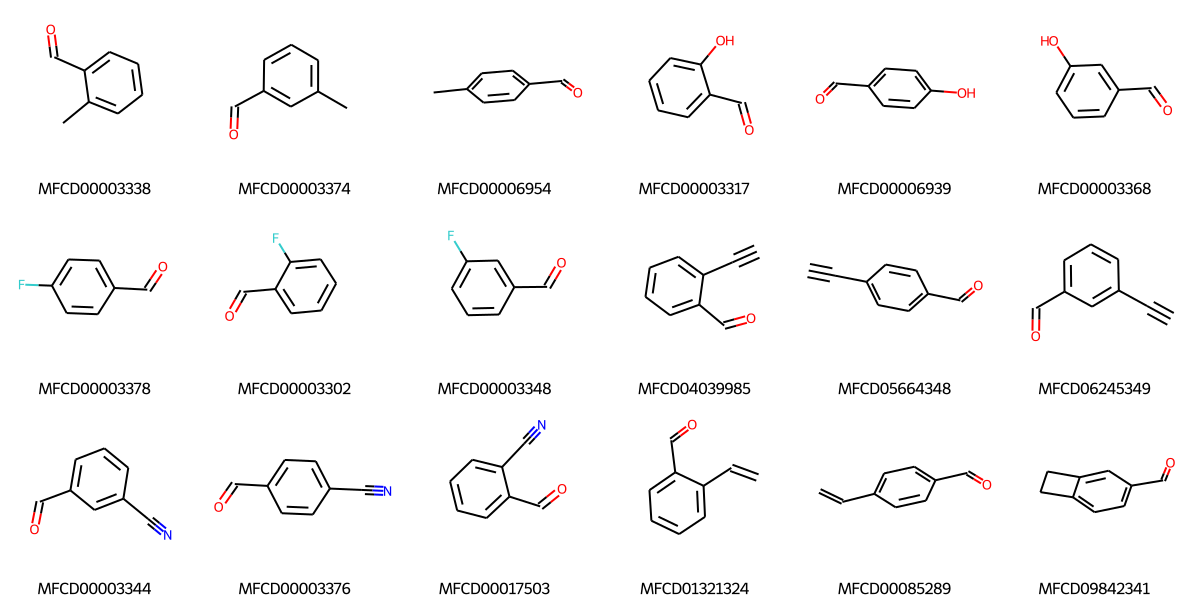

In [11]:
Chem.Draw.MolsToGridImage(df['mol'].apply(Chem.RemoveHs),legends=list(df['MFCD']),molsPerRow=6,maxMols=18)

In [12]:
df

,MWT,MF,PARENT_MWT,SMILES,SUPPLIER_NAME,CATALOG_NUMBER,CAS,CHEMICAL_NAME,MFCD,EMOLECULES_ID,mol,MFC#
10,120.15,C8H8O,120.15,Cc1ccccc1C=O,Alfa Aesar (US),0,NaN,"o-Tolualdehyde, 98%, stab. with 0.1% hydroquinone",MFCD00003338,479244,<rdkit.Chem.rdchem.Mol object at 0x0000020EE06...,32
42,120.15,C8H8O,120.15,Cc1cccc(C=O)c1,Alfa Aesar (US),0,NaN,"m-Tolualdehyde, 97%, stab. with 0.1% hydroquinone",MFCD00003374,532075,<rdkit.Chem.rdchem.Mol object at 0x0000020EE07...,36
78,120.15,C8H8O,120.15,Cc1ccc(C=O)cc1,Alfa Aesar (US),0,NaN,"p-Tolualdehyde, 98%",MFCD00006954,532081,<rdkit.Chem.rdchem.Mol object at 0x0000020EE07...,37
160,122.12,C7H6O2,122.12,Oc1ccccc1C=O,InterBioScreen,0,NaN,2-hydroxybenzaldehyde,MFCD00003317,475256,<rdkit.Chem.rdchem.Mol object at 0x0000020EE07...,20
180,122.12,C7H6O2,122.12,Oc1ccc(C=O)cc1,InterBioScreen,0,NaN,4-hydroxybenzaldehyde,MFCD00006939,481831,<rdkit.Chem.rdchem.Mol object at 0x0000020EE07...,46
...,...,...,...,...,...,...,...,...,...,...,...,...
37888,199.21,C12H9NO2,199.21,O=Cc1ccc(Oc2cccnc2)cc1,Chem-Impex,23675,NaN,4-(Pyridin-3-yloxy)benzaldehyde,MFCD03840161,932825,<rdkit.Chem.rdchem.Mol object at 0x0000020EE24...,23
37911,199.21,C12H9NO2,199.21,O=Cc1ccccc1Oc1ccccn1,Maybridge,0,NaN,2-(pyrid-2-yloxy)benzaldehyde,MFCD09025852,11467419,<rdkit.Chem.rdchem.Mol object at 0x0000020EE24...,17
37970,199.21,C12H9NO2,199.21,O=Cc1ccc(Oc2ccccn2)cc1,Maybridge,0,NaN,4-(pyrid-2-yloxy)benzaldehyde,MFCD08435899,299999421,<rdkit.Chem.rdchem.Mol object at 0x0000020EE24...,14
38083,199.25,C13H13NO,199.25,Cc1ccc(C)n1-c1ccc(C=O)cc1,Key Organics/BIONET,9,NaN,"4-(2,5-dimethyl-1H-pyrrol-1-yl)benzene carbald...",MFCD00177098,930141,<rdkit.Chem.rdchem.Mol object at 0x0000020EE24...,11
